In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
import shutil

In [2]:
# We decided to exclude the 'other' category.

influencer_category = ['beauty', 'family', 'fashion', 'fitness', 'food', 'interior', 'pet', 'travel']

In [3]:
influencers_data = '/Users/mshayganfar/sb_capstone/data/influencers.csv'

In [4]:
df_influencers = pd.read_csv(influencers_data)

In [5]:
influencers_counts = {}

for category in influencer_category:
    influencers_counts[category] = df_influencers[df_influencers['category'] == category].username.count()

In [6]:
influencers_counts

{'beauty': 1541,
 'family': 4070,
 'fashion': 11911,
 'fitness': 1133,
 'food': 3565,
 'interior': 1195,
 'pet': 587,
 'travel': 4210}

In [7]:
row_index = random.randint(0, influencers_counts["beauty"]-1)
print(row_index)
df_influencers.iloc[row_index]

1149


username         chandlerlovelle
category                  beauty
num_followers            93978.0
num_followees             1478.0
num_posts                  299.0
Name: 1149, dtype: object

In [8]:
NUM_OF_INFLUENCERS_PER_CATEGORY = 10
NUM_OF_FILES_PER_INFLUENCER = 10

In [9]:
# Number of influencers per category and accumulated number.

category_cum_sum = 0

for category in influencers_counts:
    category_cum_sum = category_cum_sum + influencers_counts[category]
    print(f"{category}: {influencers_counts[category]} , acc: {category_cum_sum}")

beauty: 1541 , acc: 1541
family: 4070 , acc: 5611
fashion: 11911 , acc: 17522
fitness: 1133 , acc: 18655
food: 3565 , acc: 22220
interior: 1195 , acc: 23415
pet: 587 , acc: 24002
travel: 4210 , acc: 28212


In [10]:
# Randomly picking N usernames in each category.

category_cum_sum = 0
prev_count = 0

username_dict = {'beauty':[], 'family':[], 'fashion':[], 'fitness':[], 
                 'food':[], 'interior':[], 'pet':[], 'travel':[]}

for category in influencers_counts:
    category_cum_sum = category_cum_sum + influencers_counts[category]
    for i in range(0, NUM_OF_INFLUENCERS_PER_CATEGORY):
        row_index = random.randint(prev_count, category_cum_sum-1)
        username_dict[category].append(df_influencers.iloc[row_index].username)
    prev_count = category_cum_sum
    
print(username_dict)

{'beauty': ['naturally_candace', 'breanna_lynnn', 'crtnygrdnr', 'verenabarrosoficial', 'pureestrogen', 'glamz_junkie', 'chloezadori', 'priscila.kbreu', 'melzaldumbide', 'goldenaster'], 'family': ['k.ayo0', 'callmekatiebug', 'jennifer.mancuso', 'amotherthing', 'mlleopossum', 'jacqui_rochonchou', 'mamacheaps', 'harassedmom', 'nicolaljohnston', 'dedesecco'], 'fashion': ['britinymarie', 'happilygrey', 'adrianakp', 'viktoriahutter', 'karissapukas', 'swdmagazine', 'fromtheheelsup', 'styledandtaylored', 'itsandiebartol', 'nataliebloomm'], 'fitness': ['hmgriff11', 'garymillergman', 'marcushyde', 'charliefrederick_', 'ashleighmareeross', 'briangregan89', 'ultimatecurve', 'beckyknightx', 'mirjam_rodrigues.da.silva', 'myadventuretofit'], 'food': ['cesarsjourney', 'kathrynmccrary', 'mdub70deuce', 'katie_slimmingworldx', 'yourlocalsnob', 'fitnhealthy_', 'anavictoria_mgl', 'foods.gg', 'funmoneymom', 'losangeleseateries'], 'interior': ['judgymummy', 'mesmerize_garden', 'simplyscandinavian', 'triner2'

In [11]:
image_folders = '/Users/mshayganfar/Documents/Mahni/Influencers/images/'

In [12]:
# Reading image file names.

filenames_dict = {'beauty':[], 'family':[], 'fashion':[], 'fitness':[], 
                  'food':[], 'interior':[], 'pet':[], 'travel':[]}

for category in username_dict:
    for username in username_dict[category]:
        first_char = username[0]
        if first_char.isalpha() == False:
            first_char = '_'
        # check if file exist in destination
        if os.path.exists(image_folders + first_char):
            specific_folder = image_folders + first_char + '/'
            filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.startswith(username)]
            filenames_dict[category].append(filenames)
        else:
            print(f"Folder {first_char} doesn't exists!")
    print(f"Category {category} is done.")

Category beauty is done.
Category family is done.
Category fashion is done.
Category fitness is done.
Category food is done.
Category interior is done.
Category pet is done.
Category travel is done.


In [90]:
# filenames_dict

In [14]:
# Number of image files within each category per influencer.

for category in filenames_dict:
    for i in range(0, len(filenames_dict[category])):
        print(f"category: {category}, len: {len(filenames_dict[category][i])}, i: {i}")

category: beauty, len: 331, i: 0
category: beauty, len: 310, i: 1
category: beauty, len: 322, i: 2
category: beauty, len: 372, i: 3
category: beauty, len: 371, i: 4
category: beauty, len: 306, i: 5
category: beauty, len: 377, i: 6
category: beauty, len: 300, i: 7
category: beauty, len: 387, i: 8
category: beauty, len: 394, i: 9
category: family, len: 1662, i: 0
category: family, len: 630, i: 1
category: family, len: 495, i: 2
category: family, len: 379, i: 3
category: family, len: 379, i: 4
category: family, len: 333, i: 5
category: family, len: 332, i: 6
category: family, len: 335, i: 7
category: family, len: 289, i: 8
category: family, len: 359, i: 9
category: fashion, len: 307, i: 0
category: fashion, len: 413, i: 1
category: fashion, len: 301, i: 2
category: fashion, len: 307, i: 3
category: fashion, len: 327, i: 4
category: fashion, len: 551, i: 5
category: fashion, len: 371, i: 6
category: fashion, len: 330, i: 7
category: fashion, len: 317, i: 8
category: fashion, len: 253, i: 9

In [15]:
subsampled_filenames_dict = {'beauty':[], 'family':[], 'fashion':[], 'fitness':[], 
                             'food':[], 'interior':[], 'pet':[], 'travel':[]}

In [16]:
# Subsampling M number of image files within each category per influencer.

for category in filenames_dict:
    for i in range(0, len(filenames_dict[category])):
        influencer_image_filenames = []
        for file_count in range(0, NUM_OF_FILES_PER_INFLUENCER): 
            filename_index = random.randint(0, len(filenames_dict[category][i])-1)
            influencer_image_filenames.append(filenames_dict[category][i][filename_index])
        subsampled_filenames_dict[category].append(influencer_image_filenames)

In [87]:
# subsampled_filenames_dict

In [18]:
src_image_folders_base     = '/Users/mshayganfar/Documents/Mahni/Influencers/images/'
dst_image_folders_base     = '/Users/mshayganfar/Documents/Mahni/Influencers/subset_images/'
resized_image_folders_base = '/Users/mshayganfar/Documents/Mahni/Influencers/resized_images/'

In [19]:
# Copying the subsampled files into the destination folder.

for category in subsampled_filenames_dict:
    for i in range(0, len(subsampled_filenames_dict[category])):
        for j in range(0, len(subsampled_filenames_dict[category][i])):
            filename = subsampled_filenames_dict[category][i][j]
            first_char = filename[0]
            if first_char.isalpha() == False:
                first_char = '_'
            # check if file exist in destination
            if os.path.exists(src_image_folders_base + first_char):
                specific_src_folder = src_image_folders_base + first_char + '/'
                shutil.copy(specific_src_folder + filename, dst_image_folders_base + category + '/' + filename)
            else:
                print(f"Folder {first_char} doesn't exists!")
    print(f"Category {category} is done.")

Category beauty is done.
Category family is done.
Category fashion is done.
Category fitness is done.
Category food is done.
Category interior is done.
Category pet is done.
Category travel is done.


### Image Preparation

In [80]:
def load_image(image_path, image_name):
    image = cv2.imread(os.path.join(image_path, image_name))
    # print(os.path.join(image_path, image_name))
    return image

In [88]:
def resize_image(src_image, width, height):
    # print('Original Image Dimensions: ', src_image.shape)
    
    dim = (width, height)
    
    # resize image
    resized_image = cv2.resize(src_image, dim, interpolation=cv2.INTER_AREA)
    
    # print('Resized Image Dimensions : ', resized_image.shape)
    
    return resized_image

In [22]:
def save_image(image_path, image_name, image):
    cv2.imwrite(os.path.join(image_path , image_name), image)

In [89]:
# Resizing and saving subsampled images into a new folder.

for category in subsampled_filenames_dict:
    filenames = os.listdir(dst_image_folders_base + category + '/' + '.')
    for filename in filenames:
        if filename[-3:] == 'jpg':
            loaded_image  = load_image(dst_image_folders_base + category + '/', filename)
            resized_image = resize_image(loaded_image, 50, 50)
            save_image(resized_image_folders_base + category + '/', 'small_' + filename, resized_image)
    print(f"Category {category} is done.")

Category beauty is done.
Category family is done.
Category fashion is done.
Category fitness is done.
Category food is done.
Category interior is done.
Category pet is done.
Category travel is done.


/Users/mshayganfar/Documents/Mahni/Influencers/resized_images/beauty/small_chloezadori-1655511061216836715.jpg


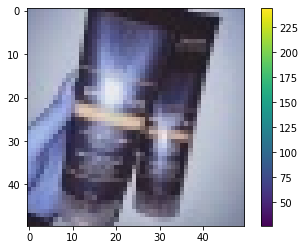

In [24]:
sample_image_path = '/Users/mshayganfar/Documents/Mahni/Influencers/resized_images/beauty/'

loaded_image  = load_image(sample_image_path, 'small_chloezadori-1655511061216836715.jpg')

plt.figure()
plt.imshow(loaded_image)
plt.colorbar()
plt.grid(False)
plt.show()

### Load Images

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
batch_size   = 32
image_height = 50
image_width  = 50

In [27]:
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    resized_image_folders_base,
    labels='inferred',
    label_mode='int',
    class_names=['beauty', 'family', 'fashion', 'fitness', 'food', 'interior', 'pet', 'travel'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="training"
)

Found 1064 files belonging to 8 classes.
Using 905 files for training.


In [28]:
validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    resized_image_folders_base,
    labels='inferred',
    label_mode='int',
    class_names=['beauty', 'family', 'fashion', 'fitness', 'food', 'interior', 'pet', 'travel'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="validation"
)

Found 1064 files belonging to 8 classes.
Using 159 files for validation.


### Classification

In [29]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [30]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, 
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 kernel_size=(3,3), 
                 input_shape=(50, 50, 3), 
                 activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, 
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 kernel_size=(3,3), 
                 activation='relu'))

# POOLING LAYER & DROPOUT
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, 
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 kernel_size=(3,3), 
                 activation='relu'))

# POOLING LAYER & DROPOUT
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, 
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                activation='relu'))
model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(64, 
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                activation='relu'))
model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
model.add(Dense(8, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          3

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [34]:
history = model.fit(train_images,
                    validation_data=validation_images,
                    epochs=200, 
                    callbacks=[early_stop])

Epoch 1/200
29/29 [==============================] - 2s 49ms/step - loss: 25.8824 - accuracy: 0.1348 - val_loss: 9.9496 - val_accuracy: 0.1132
Epoch 2/200
29/29 [==============================] - 1s 44ms/step - loss: 10.0919 - accuracy: 0.1204 - val_loss: 9.7862 - val_accuracy: 0.1195
Epoch 3/200
29/29 [==============================] - 1s 44ms/step - loss: 9.7927 - accuracy: 0.1370 - val_loss: 9.6589 - val_accuracy: 0.1384
Epoch 4/200
29/29 [==============================] - 1s 44ms/step - loss: 9.6356 - accuracy: 0.1359 - val_loss: 9.5453 - val_accuracy: 0.1447
Epoch 5/200
29/29 [==============================] - 1s 45ms/step - loss: 9.5163 - accuracy: 0.1392 - val_loss: 9.4352 - val_accuracy: 0.1572
Epoch 6/200
29/29 [==============================] - 1s 45ms/step - loss: 9.3951 - accuracy: 0.1348 - val_loss: 9.3200 - val_accuracy: 0.1509
Epoch 7/200
29/29 [==============================] - 1s 45ms/step - loss: 9.2838 - accuracy: 0.1193 - val_loss: 9.2051 - val_accuracy: 0.1509
Epoc

29/29 [==============================] - 1s 45ms/step - loss: 4.3590 - accuracy: 0.1867 - val_loss: 4.3338 - val_accuracy: 0.1887
Epoch 59/200
29/29 [==============================] - 1s 44ms/step - loss: 4.2855 - accuracy: 0.1779 - val_loss: 4.2662 - val_accuracy: 0.1635
Epoch 60/200
29/29 [==============================] - 1s 44ms/step - loss: 4.2336 - accuracy: 0.1724 - val_loss: 4.2109 - val_accuracy: 0.2075
Epoch 61/200
29/29 [==============================] - 1s 44ms/step - loss: 4.1672 - accuracy: 0.1790 - val_loss: 4.1565 - val_accuracy: 0.1887
Epoch 62/200
29/29 [==============================] - 1s 45ms/step - loss: 4.1065 - accuracy: 0.1856 - val_loss: 4.0866 - val_accuracy: 0.1761
Epoch 63/200
29/29 [==============================] - 1s 43ms/step - loss: 4.0580 - accuracy: 0.1702 - val_loss: 4.0400 - val_accuracy: 0.1761
Epoch 64/200
29/29 [==============================] - 1s 44ms/step - loss: 4.0049 - accuracy: 0.1890 - val_loss: 4.0071 - val_accuracy: 0.1761
Epoch 65/200

29/29 [==============================] - 1s 45ms/step - loss: 2.4939 - accuracy: 0.2586 - val_loss: 2.5200 - val_accuracy: 0.2013
Epoch 116/200
29/29 [==============================] - 1s 44ms/step - loss: 2.4490 - accuracy: 0.2564 - val_loss: 2.4797 - val_accuracy: 0.2390
Epoch 117/200
29/29 [==============================] - 1s 44ms/step - loss: 2.4294 - accuracy: 0.2707 - val_loss: 2.4758 - val_accuracy: 0.2327
Epoch 118/200
29/29 [==============================] - 1s 45ms/step - loss: 2.4146 - accuracy: 0.2829 - val_loss: 2.4266 - val_accuracy: 0.2767
Epoch 119/200
29/29 [==============================] - 1s 43ms/step - loss: 2.4376 - accuracy: 0.2674 - val_loss: 2.4319 - val_accuracy: 0.2327
Epoch 120/200
29/29 [==============================] - 1s 44ms/step - loss: 2.4068 - accuracy: 0.2773 - val_loss: 2.4032 - val_accuracy: 0.2767
Epoch 121/200
29/29 [==============================] - 1s 46ms/step - loss: 2.3864 - accuracy: 0.2762 - val_loss: 2.4292 - val_accuracy: 0.2327
Epoch 

### Evaluate the model

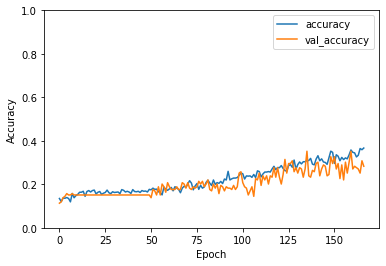

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

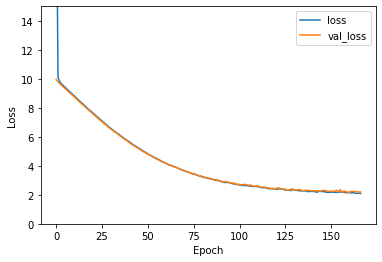

In [36]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 15])
plt.legend(loc='upper right')

In [37]:
test_loss, test_acc = model.evaluate(validation_images, verbose=2)

5/5 - 0s - loss: 2.1979 - accuracy: 0.2830 - 59ms/epoch - 12ms/step


In [38]:
metrics = pd.DataFrame(history.history)

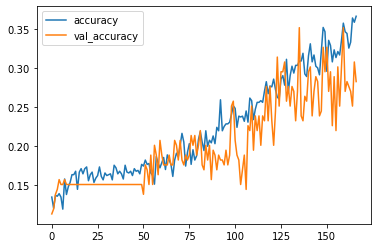

In [39]:
metrics[['accuracy','val_accuracy']].plot()

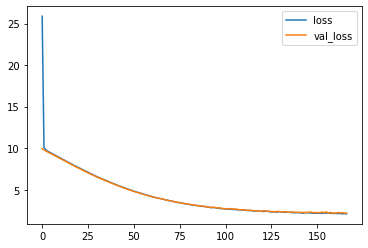

In [40]:
metrics[['loss','val_loss']].plot()

### Testing the Model

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
resized_test_image_folders_base = '/Users/mshayganfar/Documents/Mahni/Influencers/resized_test_images/'

In [68]:
# Randomly pick and load one image from each category.

random_filenames_dict = {}

for category in influencer_category:
    filenames = os.listdir(resized_test_image_folders_base + category + '/' + '.')
    random_file_index = random.randint(0, len(filenames)-1)
    random_filename = filenames[random_file_index]
    random_filenames_dict[category] = random_filename

In [48]:
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

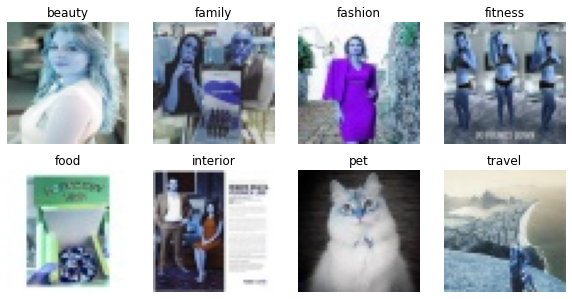

In [81]:
fig = plt.figure(figsize=(10, 5))

rows = 2
columns = 4

image_count = 1

for category in random_filenames_dict:
    loaded_image = load_image(resized_test_image_folders_base + category + '/', random_filenames_dict[category])
    fig.add_subplot(rows, columns, image_count)
    plt.imshow(loaded_image)
    plt.axis('off')
    plt.title(category)
    image_count = image_count + 1

In [86]:
for category in random_filenames_dict:
    test_image = load_image(resized_test_image_folders_base + category + '/', random_filenames_dict[category])
    test_image = np.expand_dims(test_image, axis=0)
    prediction = model.predict(test_image)
    print(f'{category}: {prediction}\n')

beauty: [[0.05447406 0.08000029 0.05766949 0.03678488 0.04961679 0.31258562
  0.15137273 0.2574961 ]]

family: [[0.07507223 0.09547472 0.0734721  0.04289745 0.0474414  0.2594138
  0.18054064 0.22568764]]

fashion: [[0.17722817 0.16935824 0.2533738  0.12016333 0.02584107 0.00873986
  0.21187828 0.03341723]]

fitness: [[0.06035996 0.10092706 0.07022538 0.04342386 0.04268545 0.24492863
  0.17724374 0.2602059 ]]

food: [[0.06318903 0.10240015 0.07722733 0.04814238 0.04683312 0.2288489
  0.18296665 0.25039247]]

interior: [[0.10637055 0.17831066 0.15927796 0.10161479 0.04471525 0.05392301
  0.22846664 0.12732114]]

pet: [[0.06277275 0.08634216 0.0599202  0.03757866 0.04809511 0.30233583
  0.15905182 0.24390344]]

travel: [[0.05027896 0.07719784 0.05389443 0.03431011 0.04687876 0.3251056
  0.14541452 0.26691982]]

